Import Data

In [2]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X_train = data_fetcher.get_X()
y_train = data_fetcher.get_y()


------class run complete------



Feature Scaling

In [3]:
#scaling the feature dataset:
from sklearn.preprocessing import StandardScaler 
#formula for scaling: x_scaled = (x - mean)/std_deviation
# fit the Scaler
scaler = StandardScaler() #creating an instance of the StandardScaler class.
#Scaling the values such that the mean is 0 and std deviation is 1.
scaler.fit(X_train) #fitting the scaler to the training set.
X_train = scaler.transform(X_train) #transforming the training set. 
X_test = scaler.transform(X_test) #transforming the testing set.

Initial Model

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_clf = KNeighborsClassifier()

# Fit the model on the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_1 = knn_clf.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------KNN Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------KNN Metrics----------

Accuracy: 0.9166666666666666
Precision: 0.9428571428571428
Recall: 0.9166666666666666
F1 Score: 0.9295774647887323

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.94      0.92      0.93        36

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



Initial Confusion matrix 

[[22  2]
 [ 3 33]]


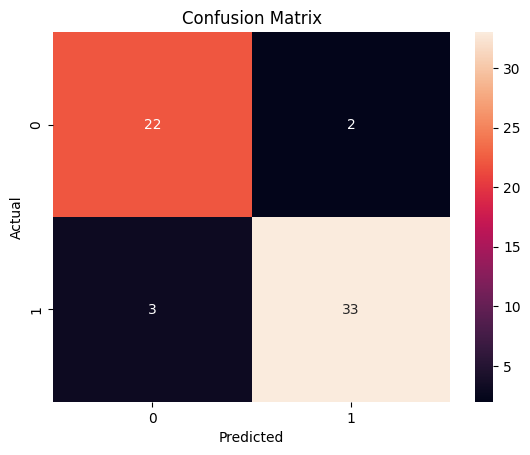

In [5]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Grid Search

In [6]:
#perform grid search for different neighbors
from sklearn.model_selection import GridSearchCV
import numpy as np
#give the parameters to be tested
param_grid = {'n_neighbors': np.arange(1, 100), 
                'weights' : ['uniform', 'distance'],
                'p': [1,2],
                'algorithm': ['ball_tree', 'kd_tree', 'brute'], 
                'leaf_size': [2,3,5,15,16,18,20],
            }
#perform grid search
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
#fit the model to find the best parameters
knn_tuned = grid.fit(X_train, y_train)

#display the best parameters
print("\nTuned KNN Parameters: {}".format(grid.best_params_))
print("Best score is {}".format(grid.best_score_))
print("best estimator: ", knn_tuned.best_estimator_)

Fitting 10 folds for each of 8316 candidates, totalling 83160 fits

Tuned KNN Parameters: {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 32, 'p': 1, 'weights': 'uniform'}
Best score is 0.8360919540229886
best estimator:  KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=32, p=1)


Testing of Final Model

In [7]:
#initialize the model with the best parameters
from sklearn.neighbors import KNeighborsClassifier
knn_tuned = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=32, p=1, weights='uniform')

#fit the model
knn_tuned.fit(X_train, y_train)
#test the model with the best parameters on the test set
y_pred = knn_tuned.predict(X_test)

#evaluate the model
print("\n----------KNN Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)




----------KNN Metrics----------

Accuracy: 0.9333333333333333
Precision: 0.9210526315789473
Recall: 0.9722222222222222
F1 Score: 0.9459459459459458

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.92      0.97      0.95        36

    accuracy                           0.93        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.93      0.93      0.93        60



Confusion Matrix

[[21  3]
 [ 1 35]]


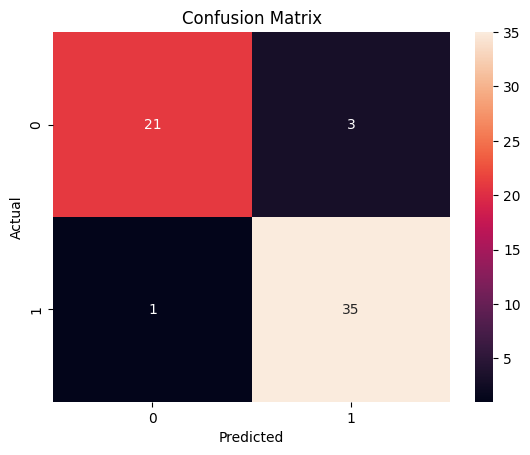

In [8]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Cross Validation

In [9]:
#cross validaayion for 10 folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring="accuracy") #scorinf can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #the lower the standard deviation, the better the model
#standard deviation is calculated for the scores of each fold
#get the variance of the scores
print("Variance:", scores.var()) #the lower the variance, the better the model


Fold 0 : 0.9
Fold 1 : 0.7666666666666667
Fold 2 : 0.8
Fold 3 : 0.9
Fold 4 : 0.9
Fold 5 : 0.7666666666666667
Fold 6 : 0.8666666666666667
Fold 7 : 0.8333333333333334
Fold 8 : 0.7
Fold 9 : 0.7241379310344828

Mean: 0.8157471264367817
Standard Deviation: 0.07145146000981843
Variance: 0.005105311137534682


Learning Curve

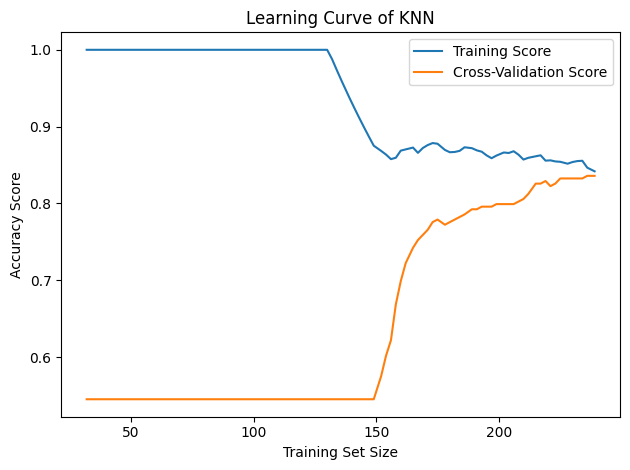

In [10]:
#plot the learning curve for the model
#use Recall as the scoring metric because the model should idealy minimize the number of false negatives.
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(knn_tuned, X_train, y_train, cv=5, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,100))

#plot the learning curve
import matplotlib.pyplot as plt
import numpy as np
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of KNN")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()

#Conclusions:
#1. From the learning curve, we can conclude that we have a good balance between bias and variance.
#2. The model is neither overfitting nor underfitting.
#3. The learning curve shows that the model is just right.

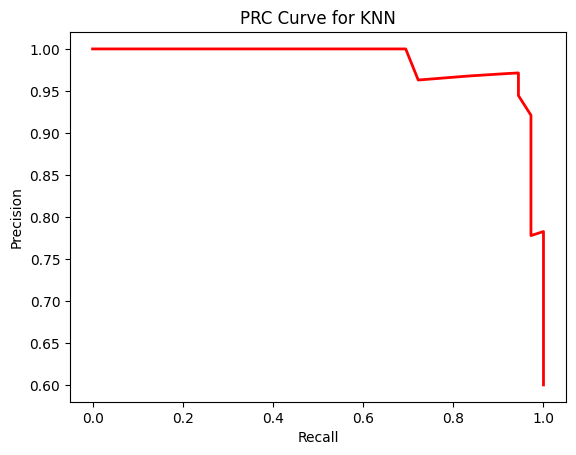

In [20]:
#plot the PRC curve
from sklearn.metrics import precision_recall_curve
#get the probabilities of the predictions
y_pred_prob = knn_tuned.predict_proba(X_test)[:,1]
#calculate the precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
#plot the PRC curve
import matplotlib.pyplot as plt
plt.plot(recall, precision, 'r-', linewidth=2 )
plt.title("PRC Curve for KNN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

